In [1]:
from openai import OpenAI
import pandas as pd
client = OpenAI()
df = pd.read_csv('3word-constructions.csv')
# Limit the DataFrame to the first 1000 rows
df = df.head(100)

def translate(arb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English." +
             "Purpose of the translation: To study the accuracy of gpt api on Darija translation to English."+
             "Target audience: Darija Computational linguists."
            },
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect sentence into English using sentence-by-sentence translation."             },
            {"role": "assistant", "content": "OK, I understand. I am ready to translate to English."},
            {"role": "user", "content": "ماغانطيّبوش ماكلا طاليانيا"},
            {"role": "assistant", "content": "we are not preparing an italian meal"},
            {"role": "user", "content":  f"{arb}" }
            ], 
        temperature=0.1  # Deterministic responses
        )
    return completion.choices[0].message.content
df['transl'] = df['darija_ar'].apply(translate)

# Display or save the resulting DataFrame
print(df['transl'])

0     Good, it's written on the road!
1                       Thank you, no
2                What does this mean?
3     We are talking about Marrakech.
4                     Are you stupid?
                   ...               
95                       This is life
96            Are you giving me this?
97                Am I understanding?
98                     I rely on her.
99           Black or white eyeliner?
Name: transl, Length: 100, dtype: object


c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[(2, "Good, it's written on the road!", "of course he's depressive!", 0.35451844334602356, False), (3, 'Thank you, no', "Thank you, ma'am", 0.741635799407959, True), (4, 'What does this mean?', 'what is that meant to be?', 0.9385789036750793, True), (5, 'We are talking about Marrakech.', "I'm talking about Marrakech", 0.9761080741882324, True), (6, 'Are you stupid?', 'are you crazy!', 0.9121701717376709, True), (7, 'Let me go now.', 'I have to go now', 0.8436726927757263, True), (8, 'Do not mock, I am with you', "Okay, I'm with you", 0.8549596071243286, True), (9, 'What do you want with him?', 'What do you want with it?', 0.8848836421966553, True), (10, 'They are getting married at a very young age.', 'They got married very young', 0.8874338865280151, True), (11, 'We are not going to cook Italian food.', 'we are not preparing an italian meal', 0.9364867210388184, True), (12, "Don't hesitate to come back to me.", 'do not hesitate to come back to me', 0.9896489381790161, True), (13, 'Ple

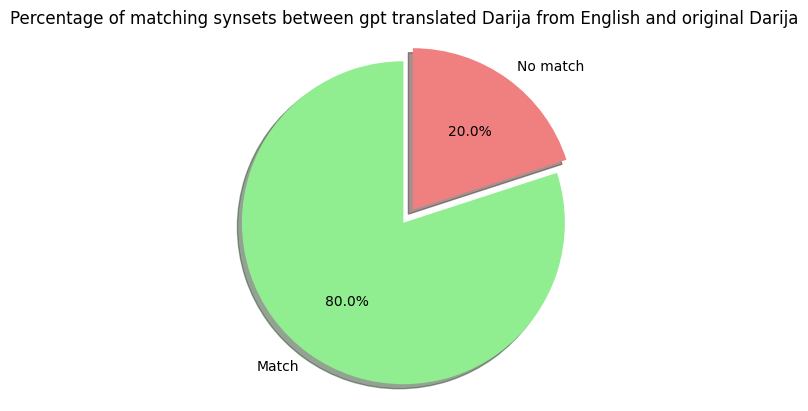

In [2]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from sentence_transformers import SentenceTransformer, util

model_name = 'bert-base-nli-mean-tokens'
# Load a pre-trained SentenceTransformer model
model = SentenceTransformer(model_name)


transl = df['transl']
eng = df['eng']


#embedding= model.encode(eng[0])
#embedding2 = model.encode(transl[0])
#similarity = util.pytorch_cos_sim(embedding, embedding2)
#print(similarity.item())

results = []
def evaluate_pairs(transl, eng, threshold=0.7):
    for i in range(len(transl)):
        sentence1, sentence2 = transl[i], eng[i]
        embedding1 = model.encode(sentence1, convert_to_tensor=True)
        embedding2 = model.encode(sentence2, convert_to_tensor=True)
        similarity = util.pytorch_cos_sim(embedding1, embedding2)
        results.append((i+2, sentence1, sentence2, similarity.item(), similarity.item() >= threshold))
    return results
results = evaluate_pairs(transl, eng)
print(results)


# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")

plt.show()